In [23]:
##################### Making Essential Imports ############################
import sklearn
import os
import sys
import matplotlib.pyplot as plt
import cv2
import pytesseract
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import load_model, Model
conf = r'-- oem 2'

In [24]:
Path = '../../data/Violent_Crimes/'
#Path='/content/drive/MyDrive/Train_Test/Test'
# Path='/content/drive/MyDrive/Disaster Images SA'

In [25]:
#####################################
# Defining a skeleton for our       #
# DataFrame                         #
#####################################
DataFrame = {
    'photo_name' : [],
    'flattenPhoto' : [],
    'text' : [],
    }

In [26]:
#######################################################################################
#      The Approach is to apply transfer learning hence using Resnet50 as             #
#      pretrained model                                                               #
#######################################################################################

#MyModel = tf.keras.models.Sequential()
from keras.applications import VGG16

#MyModel.add(tf.keras.applications.ResNet50(include_top = False, weights='imagenet', pooling='avg'))
vgg=VGG16(include_top = False, weights='imagenet', pooling='avg')

In [27]:
# freezing weights for 1st layer
for i in vgg.layers:
    i.trainable = False

In [30]:
### Now defining dataloading Function
def LoadDataAndDoEssentials(path, h, w):

    img = cv2.imread(path)
    #DataFrame['text'].append(pytesseract.image_to_string(img, config = conf))
    img = cv2.resize(img, (h, w))
    ## Expanding image dims so this represents 1 sample
    img = img = np.expand_dims(img, 0)
    #img = vgg.preprocess_input(img)
    img=tf.keras.applications.vgg16.preprocess_input(img)
    extractedFeatures = vgg.predict(img)
    extractedFeatures = np.array(extractedFeatures)
    DataFrame['flattenPhoto'].append(extractedFeatures.flatten())

In [32]:
### with this all done lets write the iterrrative loop
def ReadAndStoreMyImages(path):

    list_ = os.listdir(path)
    for mem in list_:
        DataFrame['photo_name'].append(mem)
        imagePath = path + '/' + mem
        LoadDataAndDoEssentials(imagePath, 224, 224)
        

In [33]:
### lets give the address of our Parent directory and start
ReadAndStoreMyImages(Path)

1/1 [==============================] - 0s 156ms/step


In [35]:
######################################################
#        lets now do clustering                      #
######################################################
Training_Feature_vector = np.array(DataFrame['flattenPhoto'], dtype = 'float64')
from sklearn.cluster import AgglomerativeClustering
kmeans = AgglomerativeClustering(n_clusters = 2)
kmeans.fit(Training_Feature_vector)

AgglomerativeClustering()

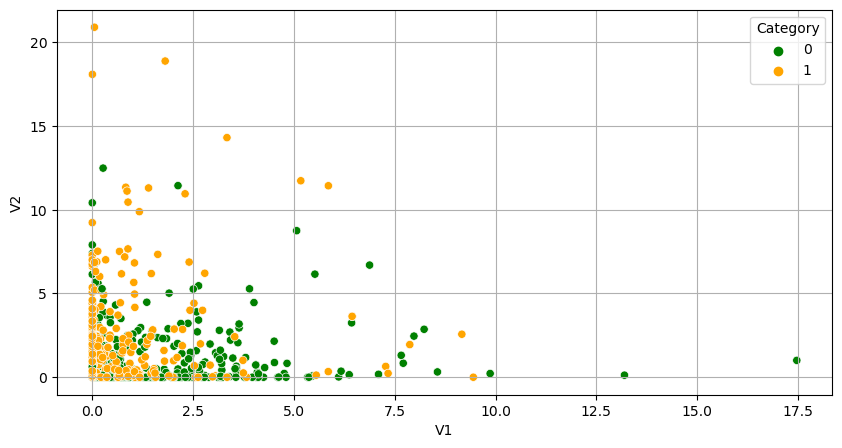

In [36]:
## lets make this a dataFrame
import seaborn as sb
import matplotlib.pyplot as plt

dimReducedDataFrame = pd.DataFrame(Training_Feature_vector)

dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2'})
dimReducedDataFrame['Category'] = list(kmeans.labels_)
plt.figure(figsize = (10, 5))
sb.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2',
                    palette=['green','orange'],hue = 'Category') 
plt.grid(True)
plt.show()

In [37]:
dimReducedDataFrame.head()

,V1,V2,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,Category
0,3.213729,0.101348,3.460764,0.302000,5.456146,0.000000,4.747141,1.578510,0.283978,1.361472,...,2.783590,1.416210,0.426899,4.617952,1.326829,2.808875,0.256645,5.470501,8.470467,0
1,1.400159,0.000000,0.497336,0.000000,6.599933,0.258101,0.312238,4.158782,0.945568,0.000000,...,1.310468,2.229558,0.331520,1.184006,0.009680,0.040623,0.144440,0.200556,17.159645,0
2,0.230213,0.304594,3.701436,0.252679,0.971009,0.090919,0.413568,0.110143,0.502504,0.000000,...,0.058462,0.741445,0.082443,0.000000,0.959162,0.241683,0.000000,1.880303,0.744744,0
3,0.195916,2.126175,0.000000,0.155356,2.278334,1.183881,0.778967,9.091240,1.604428,6.521086,...,3.198116,1.778902,2.584355,2.945229,1.369592,4.031093,3.253097,7.760945,31.066252,0
4,0.000000,0.064342,2.069051,0.258211,0.598718,0.000000,2.910131,0.000000,2.551611,1.003617,...,0.281291,1.055314,0.758767,0.560895,0.088676,0.077050,0.136926,1.173007,8.124912,0


In [38]:
#we can plot the images if required here

clust_list={0:0,1:0}
Seperated_images_name = {'Violant':[],'Non Violant':[]}

for index,i in enumerate(dimReducedDataFrame['Category']):
    if i in clust_list.keys():
        clust_list[i]=clust_list[i]+1

        if i==0:
          Seperated_images_name['Violant'].append(DataFrame['photo_name'][index])
        elif i==1:
          Seperated_images_name['Non Violant'].append(DataFrame['photo_name'][index])
          
clust_list    

{0: 506, 1: 243}

In [39]:
(Seperated_images_name['Non Violant'])

['flr_233.jpg',
 'flr_356.jpg',
 'flr_357.jpg',
 'flr_397.jpg',
 'flr_528.jpg',
 'ftb_342.jpg',
 'ftb_356.jpg',
 'ftb_357.jpg',
 'ftb_397.jpg',
 'ftb_432.jpg',
 'ftb_528.jpg',
 'rot_45_139.jpg',
 'rot_45_144.jpg',
 'rot_45_152.jpg',
 'rot_45_157.jpg',
 'rot_45_158.jpg',
 'rot_45_159.jpg',
 'rot_45_163.jpg',
 'rot_45_164.jpg',
 'rot_45_170.jpg',
 'rot_45_171.jpg',
 'rot_45_172.jpg',
 'rot_45_173.jpg',
 'rot_45_175.jpg',
 'rot_45_176.jpg',
 'rot_45_181.jpg',
 'rot_45_187.jpg',
 'rot_45_188.jpg',
 'rot_45_195.jpg',
 'rot_45_196.jpg',
 'rot_45_200.jpg',
 'rot_45_204.jpg',
 'rot_45_206.jpg',
 'rot_45_209.jpg',
 'rot_45_212.jpg',
 'rot_45_213.jpg',
 'rot_45_219.jpg',
 'rot_45_222.jpg',
 'rot_45_223.jpg',
 'rot_45_224.jpg',
 'rot_45_228.jpg',
 'rot_45_231.jpg',
 'rot_45_235.jpg',
 'rot_45_237.jpg',
 'rot_45_242.jpg',
 'rot_45_243.jpg',
 'rot_45_247.jpg',
 'rot_45_248.jpg',
 'rot_45_249.jpg',
 'rot_45_254.jpg',
 'rot_45_257.jpg',
 'rot_45_258.jpg',
 'rot_45_259.jpg',
 'rot_45_260.jpg',
 'rot_4

In [ ]:
############################################################

In [40]:
#To visualise the elbow point
from sklearn.cluster import KMeans

#kMeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(dimReducedDataFrame)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [41]:
ssd = []
range_of_clusters = [2, 3, 4, 5, 6, 7, 8]
for num in range_of_clusters:
    kmeans = KMeans(n_clusters=num, max_iter=50)
    kmeans.fit(dimReducedDataFrame)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_of_clusters,ssd)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.